In [119]:
import os
import xarray as xr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from prophet.plot import plot_plotly,plot_components_plotly
from prophet import Prophet

In [120]:
given_lat= -20.296059
given_lon= -85.824539

In [121]:
date_column = np.empty((0,),dtype='datetime64')
conc_column = np.empty((0,),dtype='float64')

In [122]:
lon_index = int(((np.floor(given_lon/0.625) * 0.625) - (-180))/0.625)
lon_index = 0 if lon_index == 576 else lon_index
lat_index = int(((np.floor(given_lat/0.5) * 0.5) - (-90))/0.5)

In [123]:
# Keep your data files here
data_folder = os.listdir('../data/aqi1') 

In [124]:
for data_file in data_folder:
    data = xr.open_dataset(f"../data/aqi1/{data_file}")

    conc_data = np.array(data['DUSMASS25'].values)[0]
    date_data = data.coords['time'].values
    
    date_val = date_data[0]
    conc_val = conc_data[lat_index][lon_index]

    date_column = np.append(date_column, date_val)
    conc_column = np.append(conc_column,conc_val)

In [125]:
date_column.shape

(228,)

In [126]:
conc_column.shape

(228,)

In [127]:
pm25_df = pd.DataFrame({'conc' : conc_column}, index=date_column)
pm25_df.index = pd.to_datetime(pm25_df.index.strftime('%Y-%m-%d'),format='%Y-%m-%d')
pm25_df

,conc
2005-01-01,2.964610e-10
2005-02-01,3.785647e-10
2005-03-01,1.991675e-10
2005-04-01,2.763307e-10
2005-05-01,9.221435e-11
...,...
2023-08-01,1.654894e-10
2023-09-01,1.394236e-10
2023-10-01,1.826249e-10
2023-11-01,1.699754e-10


In [128]:
pm25_df.describe()

,conc
count,2.280000e+02
mean,2.340294e-10
std,1.066246e-10
min,4.887981e-11
25%,1.538274e-10
50%,2.086364e-10
75%,2.959863e-10
max,6.697397e-10


In [129]:
pm25_df.value_counts().shape

(228,)

In [130]:
scaler = MinMaxScaler()
pm25_df['conc'] = scaler.fit_transform(pm25_df[['conc']])
pm25_df

,conc
2005-01-01,0.398771
2005-02-01,0.531013
2005-03-01,0.242064
2005-04-01,0.366348
2005-05-01,0.069798
...,...
2023-08-01,0.187820
2023-09-01,0.145836
2023-10-01,0.215419
2023-11-01,0.195045


In [131]:
pm25_df['datetime'] = pm25_df.index.astype('str')
pm25_df = pm25_df[['datetime','conc']]
pm25_df.reset_index(drop=True, inplace=True)
pm25_df.columns=['ds','y']
pm25_df

,ds,y
0,2005-01-01,0.398771
1,2005-02-01,0.531013
2,2005-03-01,0.242064
3,2005-04-01,0.366348
4,2005-05-01,0.069798
...,...,...
223,2023-08-01,0.187820
224,2023-09-01,0.145836
225,2023-10-01,0.215419
226,2023-11-01,0.195045


In [132]:
pro_model = Prophet(interval_width=0.95)

In [133]:
pro_model.fit(pm25_df)

19:09:31 - cmdstanpy - INFO - Chain [1] start processing
19:09:31 - cmdstanpy - INFO - Chain [1] done processing


In [134]:
future_date = pro_model.make_future_dataframe(periods=60, freq='MS')
future_date.tail()

,ds
283,2028-08-01
284,2028-09-01
285,2028-10-01
286,2028-11-01
287,2028-12-01


In [135]:
forecast = pro_model.predict(future_date)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2005-01-01,0.381269,0.156078,0.605472
1,2005-02-01,0.347714,0.117886,0.577129
2,2005-03-01,0.266393,0.031863,0.485439
3,2005-04-01,0.245133,0.006957,0.481951
4,2005-05-01,0.154873,-0.078807,0.368699


C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


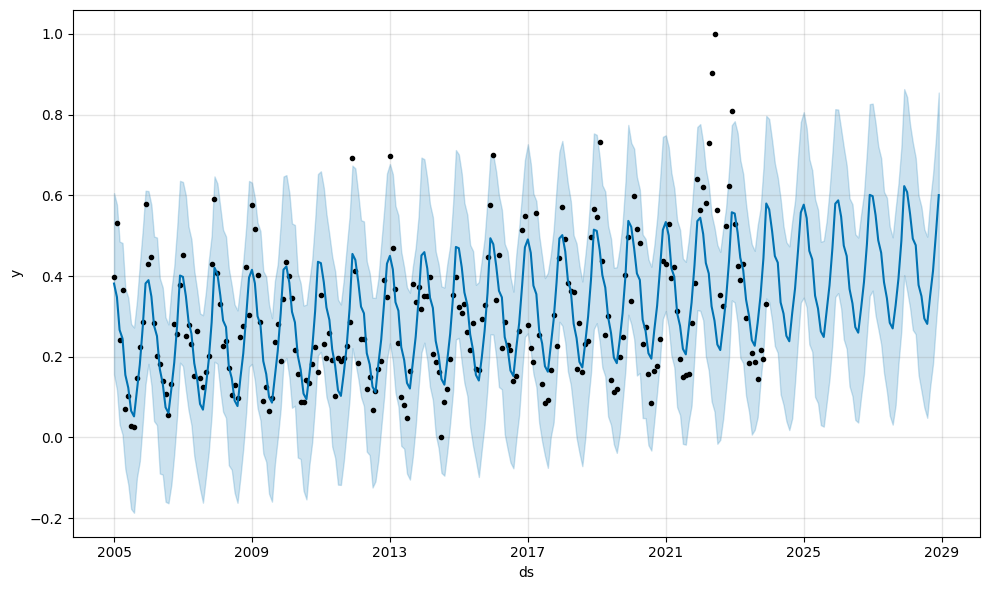

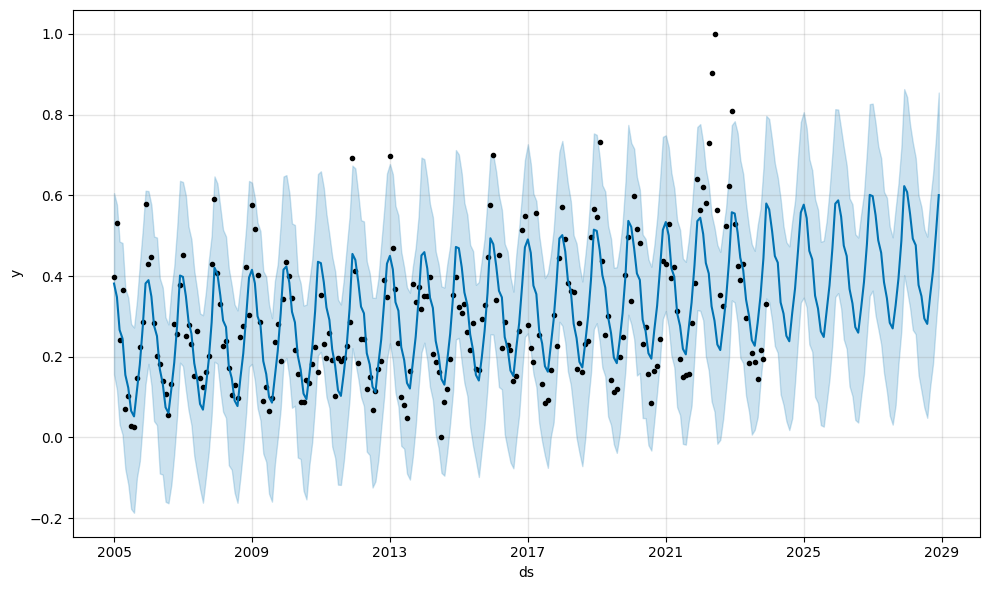

In [136]:
pro_model.plot(forecast, uncertainty=True)

C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is

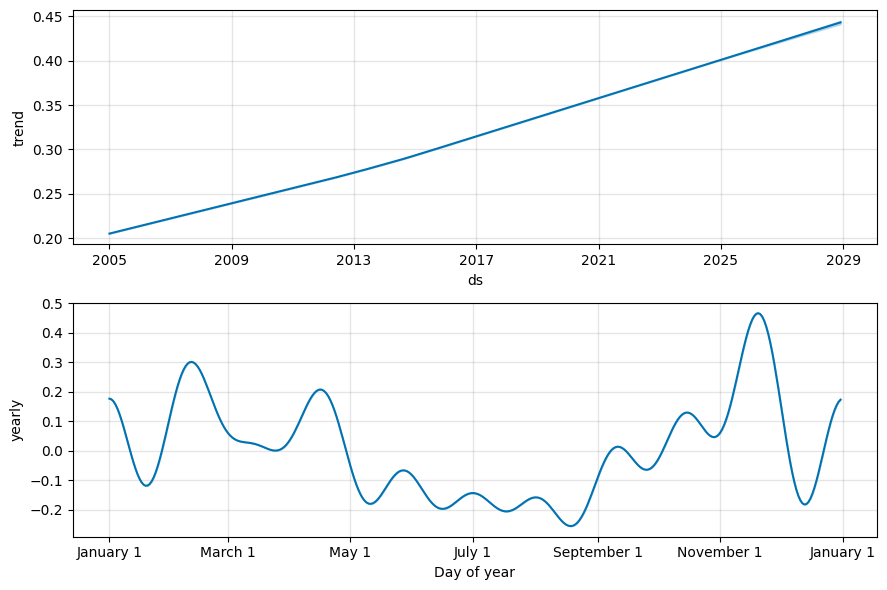

In [137]:
fig1=pro_model.plot_components(forecast)

C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


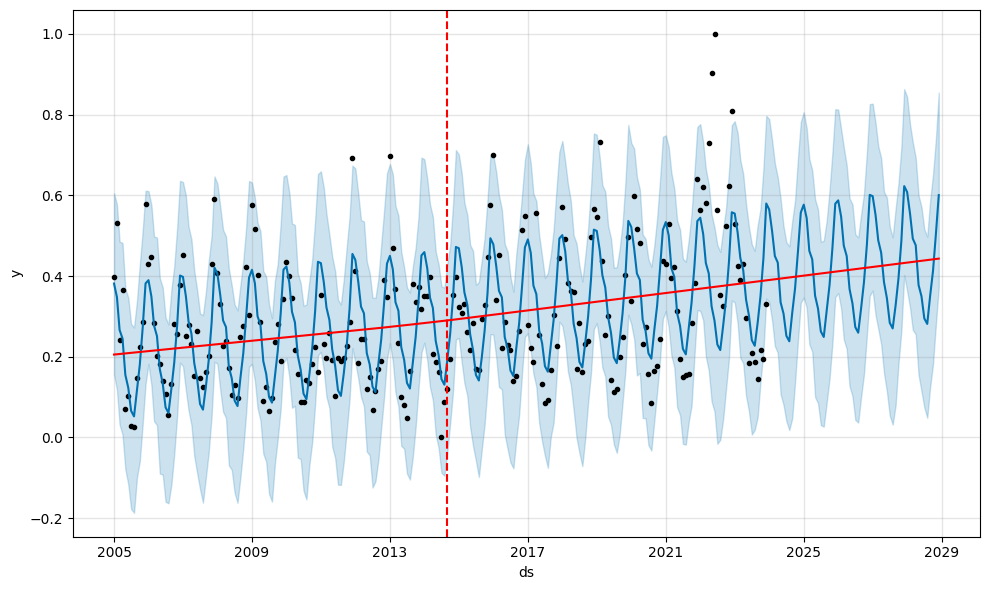

In [138]:
from prophet.plot import add_changepoints_to_plot
fig =pro_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),pro_model,forecast)

In [139]:
pro_model.changepoints

7     2005-08-01
14    2006-03-01
22    2006-11-01
29    2007-06-01
36    2008-01-01
43    2008-08-01
51    2009-04-01
58    2009-11-01
65    2010-06-01
72    2011-01-01
80    2011-09-01
87    2012-04-01
94    2012-11-01
101   2013-06-01
109   2014-02-01
116   2014-09-01
123   2015-04-01
130   2015-11-01
138   2016-07-01
145   2017-02-01
152   2017-09-01
159   2018-04-01
167   2018-12-01
174   2019-07-01
181   2020-02-01
Name: ds, dtype: datetime64[ns]

19:09:56 - cmdstanpy - INFO - Chain [1] start processing
19:09:56 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ASUS\Documents\Code\projects\minor project\code\minor-project\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


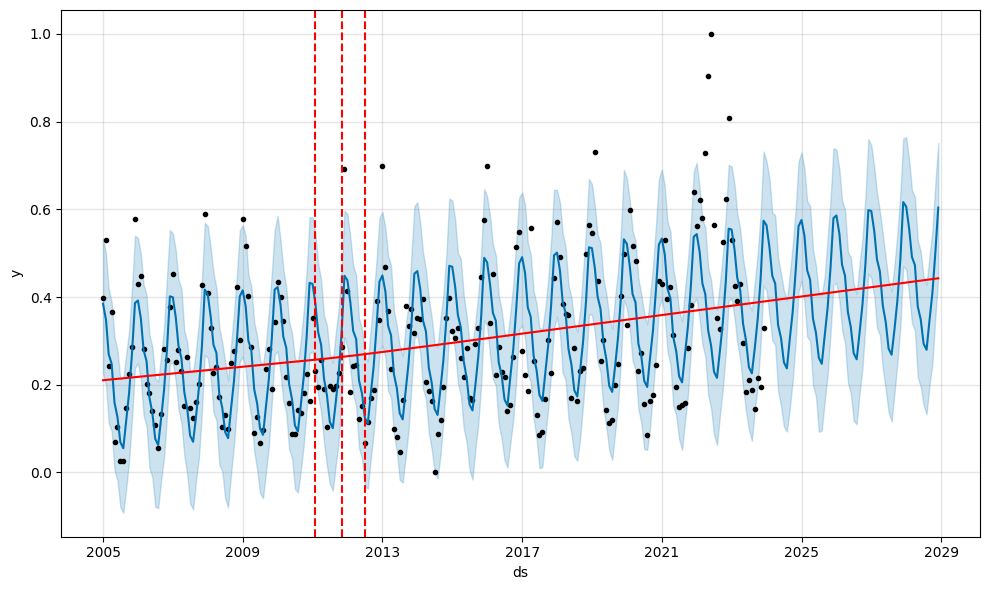

In [140]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(pm25_df).predict(future_date)
fig= pro_change.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)